In [1]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [2]:
norm_control = {
    'train': np.load('../results/arrays/train_MSEs_norm_control.npy'),
    'test': np.load('../results/arrays/test_MSEs_norm_control.npy')
}

no_norm = {
    'train': np.load('../results/arrays/train_MSEs.npy'),
    'test': np.load('../results/arrays/test_MSEs.npy'),
}


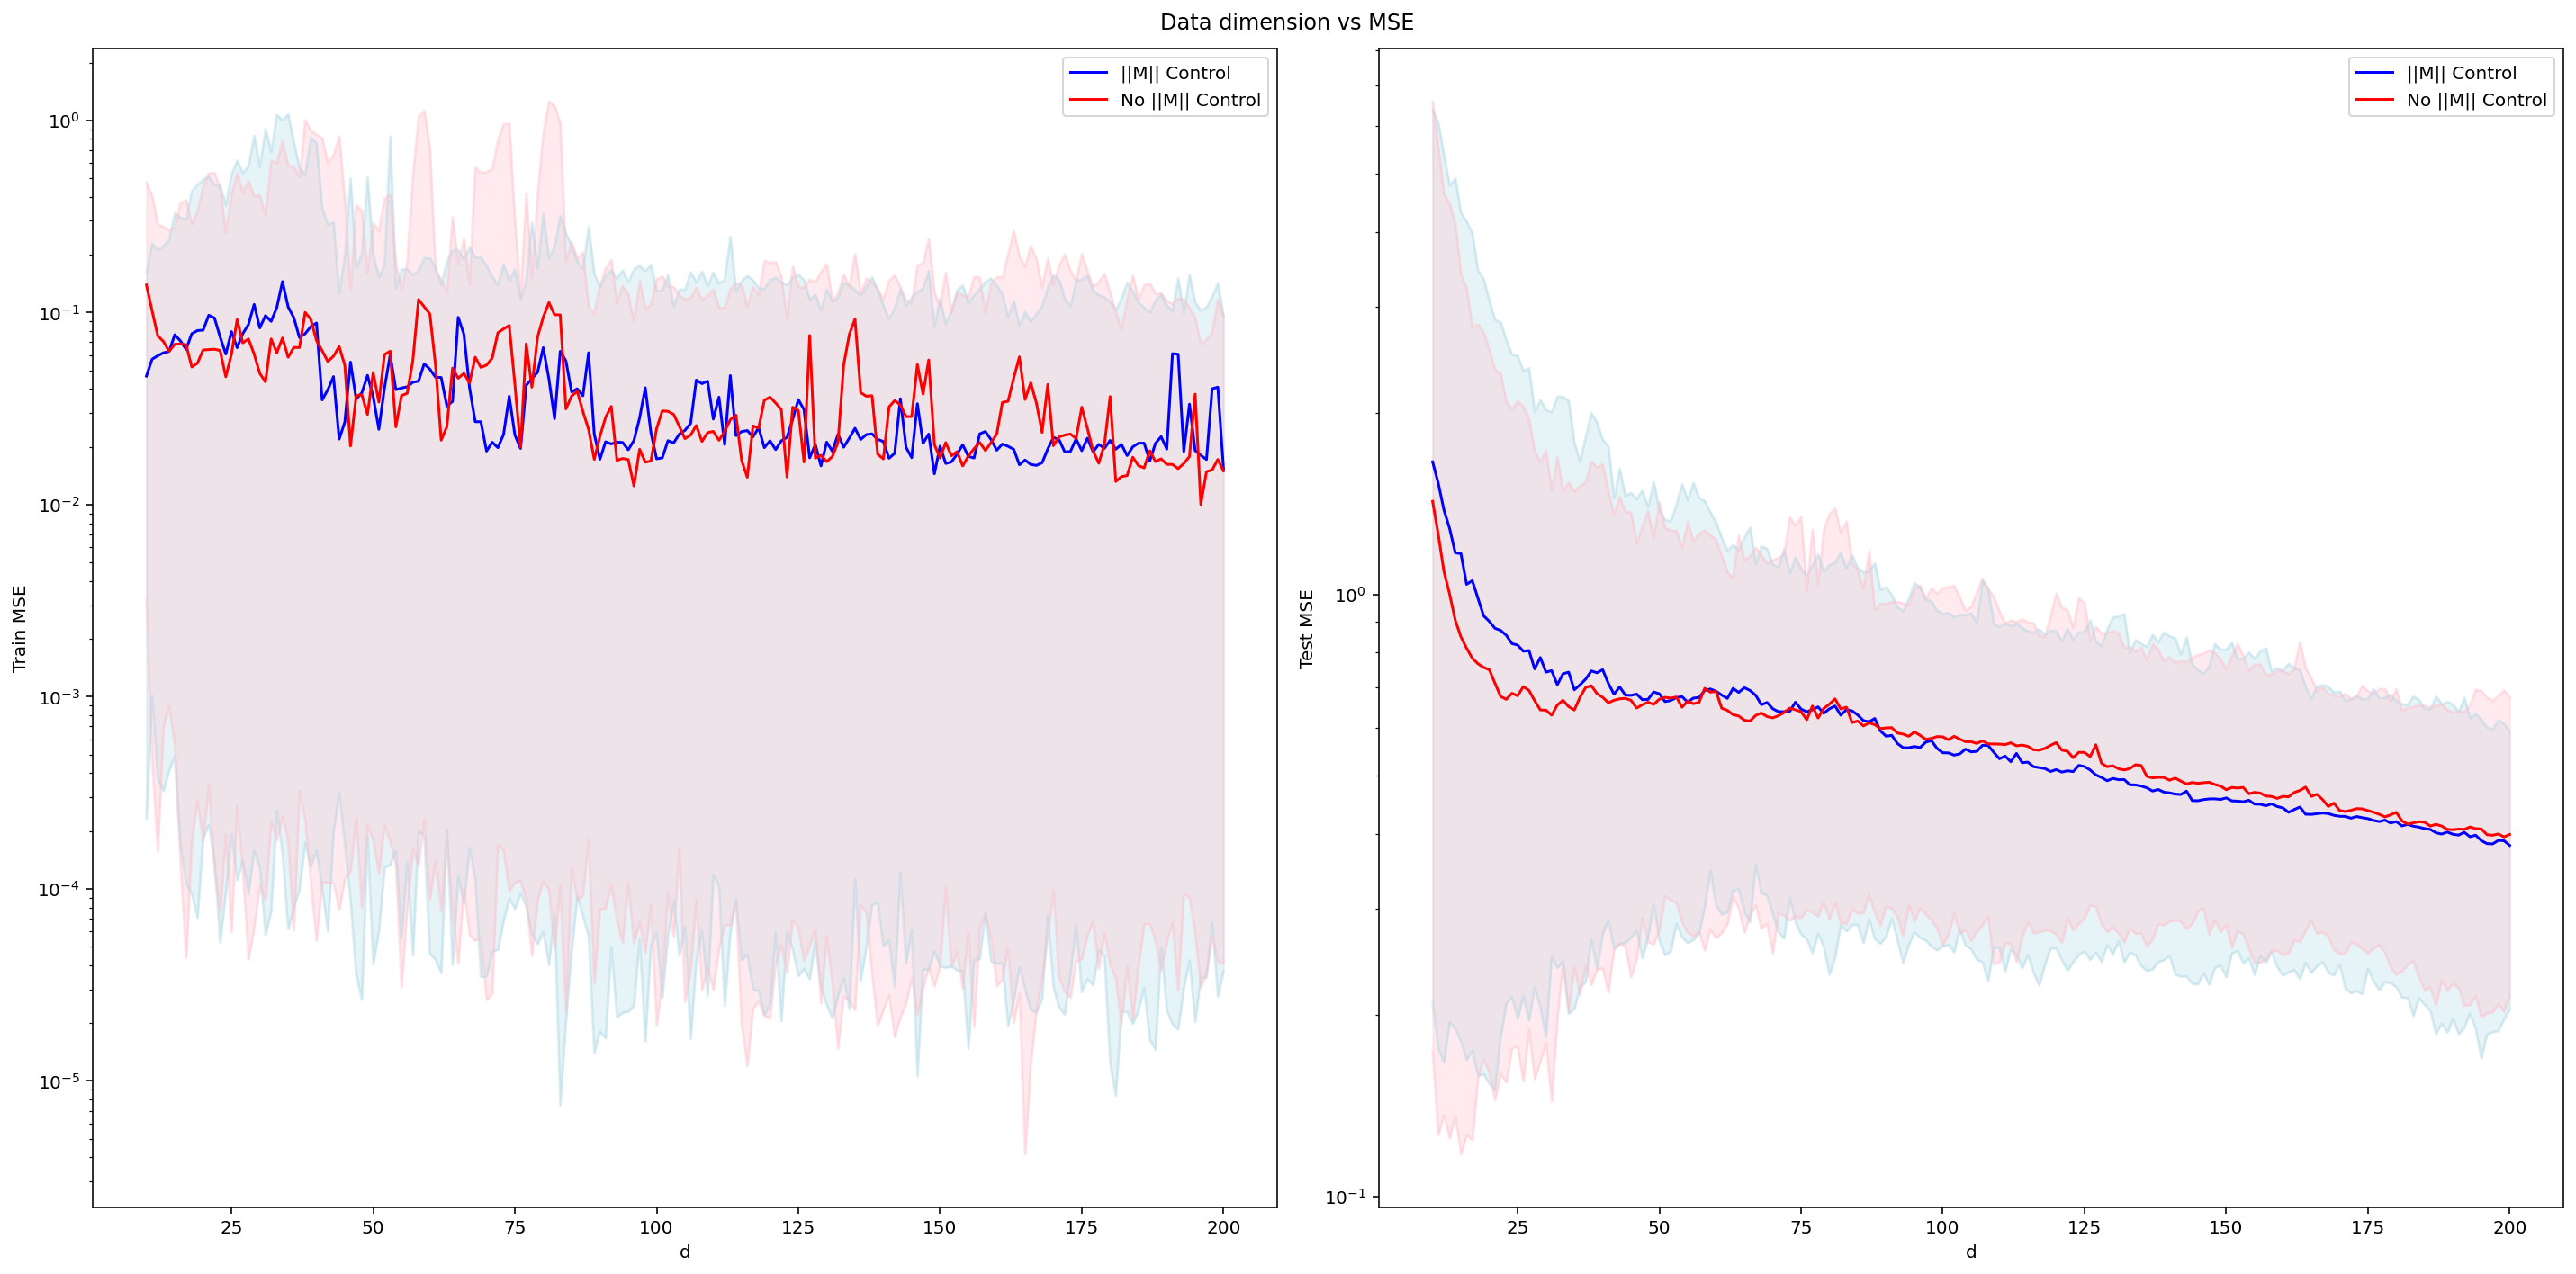

In [3]:
# plot the train and test MSEs
d_range = list(range(10, 201))

norm_control['train_mean'] = norm_control["train"].mean(axis=0)
norm_control['test_mean'] = norm_control["test"].mean(axis=0)
no_norm['train_mean'] = no_norm["train"].mean(axis=0)
no_norm['test_mean'] = no_norm["test"].mean(axis=0)

# get 2.5% and 97.5% quantiles
norm_control['train_025'] = np.quantile(norm_control["train"], 0.025, axis=0)
norm_control['train_975'] = np.quantile(norm_control["train"], 0.975, axis=0)
norm_control['test_025'] = np.quantile(norm_control["test"], 0.025, axis=0)
norm_control['test_975'] = np.quantile(norm_control["test"], 0.975, axis=0)
no_norm['train_025'] = np.quantile(no_norm["train"], 0.025, axis=0)
no_norm['train_975'] = np.quantile(no_norm["train"], 0.975, axis=0)
no_norm['test_025'] = np.quantile(no_norm["test"], 0.025, axis=0)
no_norm['test_975'] = np.quantile(no_norm["test"], 0.975, axis=0)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle("Data dimension vs MSE")

ax1.plot(d_range, norm_control['train_mean'], color='blue', label="||M|| Control")
ax1.plot(d_range, no_norm['train_mean'], color='red', label="No ||M|| Control")
ax1.plot(d_range, norm_control["train_025"], color='lightblue', alpha=0.3)
ax1.plot(d_range, norm_control["train_975"], color='lightblue', alpha=0.3)
ax1.plot(d_range, no_norm["train_025"], color='pink', alpha=0.3)
ax1.plot(d_range, no_norm["train_975"], color='pink', alpha=0.3)
ax1.fill_between(d_range, norm_control['train_025'], norm_control['train_975'], color='lightblue', alpha=0.3)
ax1.fill_between(d_range, no_norm['train_025'], no_norm['train_975'], color='pink', alpha=0.3)
ax1.set_xlabel("d")
ax1.set_ylabel("Train MSE")
ax1.set_yscale("log")
ax1.legend()

ax2.plot(d_range, norm_control['test_mean'], label="||M|| Control", color='blue')
ax2.plot(d_range, no_norm['test_mean'], label="No ||M|| Control", color='red')
ax2.plot(d_range, norm_control["test_025"], color='lightblue', alpha=0.3)
ax2.plot(d_range, norm_control["test_975"], color='lightblue', alpha=0.3)
ax2.plot(d_range, no_norm["test_025"], color='pink', alpha=0.3)
ax2.plot(d_range, no_norm["test_975"], color='pink', alpha=0.3)
ax2.fill_between(d_range, norm_control['test_025'], norm_control['test_975'], color='lightblue', alpha=0.3)
ax2.fill_between(d_range, no_norm['test_025'], no_norm['test_975'], color='pink', alpha=0.3)
ax2.set_xlabel("d")
ax2.set_ylabel("Test MSE")
ax2.set_yscale("log")
ax2.legend()

plt.tight_layout()